<a href="https://colab.research.google.com/github/syffanii/UAS-DATAMINING/blob/main/UAS_DATA_MINING_SHAKINA_PUTRI_SYIFANI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
import graphviz


**LOAD DATA SET**

In [ ]:
data = pd.read_csv("diabetes.csv")

**READ DATA SET**

In [ ]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**DESKRIPSI DATASET**

In [ ]:
#Jumlah Data
print("Jumlah data:", data.shape)

#Nama Kolom
print("\nNama kolom:", data.columns.tolist())

#Info Dataset
print("nInformasi data:")
data.info()

#Statistik Deskriptif
print("\nStatistik deskriptif:")
print(data.describe())

Jumlah data: (768, 9)

Nama kolom: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
nInformasi data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Statistik deskriptif:
       Pregnancies     Glucose  BloodPre

**ANALISIS DATASET**

In [ ]:
for col in data.columns:
    print(f"\n--- Kolom: {col} ---")
    print("Tipe Data:", data[col].dtype)
    print("Jumlah Nilai Unik:", data[col].nunique())
    print("Jumlah Data Kosong:", data[col].isnull().sum())
    print("Nilai Terbanyak (mode):", data[col].mode()[0])


--- Kolom: Pregnancies ---
Tipe Data: int64
Jumlah Nilai Unik: 17
Jumlah Data Kosong: 0
Nilai Terbanyak (mode): 1

--- Kolom: Glucose ---
Tipe Data: int64
Jumlah Nilai Unik: 136
Jumlah Data Kosong: 0
Nilai Terbanyak (mode): 99

--- Kolom: BloodPressure ---
Tipe Data: int64
Jumlah Nilai Unik: 47
Jumlah Data Kosong: 0
Nilai Terbanyak (mode): 70

--- Kolom: SkinThickness ---
Tipe Data: int64
Jumlah Nilai Unik: 51
Jumlah Data Kosong: 0
Nilai Terbanyak (mode): 0

--- Kolom: Insulin ---
Tipe Data: int64
Jumlah Nilai Unik: 186
Jumlah Data Kosong: 0
Nilai Terbanyak (mode): 0

--- Kolom: BMI ---
Tipe Data: float64
Jumlah Nilai Unik: 248
Jumlah Data Kosong: 0
Nilai Terbanyak (mode): 32.0

--- Kolom: DiabetesPedigreeFunction ---
Tipe Data: float64
Jumlah Nilai Unik: 517
Jumlah Data Kosong: 0
Nilai Terbanyak (mode): 0.254

--- Kolom: Age ---
Tipe Data: int64
Jumlah Nilai Unik: 52
Jumlah Data Kosong: 0
Nilai Terbanyak (mode): 22

--- Kolom: Outcome ---
Tipe Data: int64
Jumlah Nilai Unik: 2
Jumlah 

**VISUALISASI DISTRIBUSI FITUR**

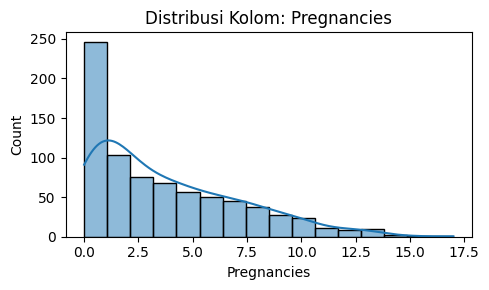

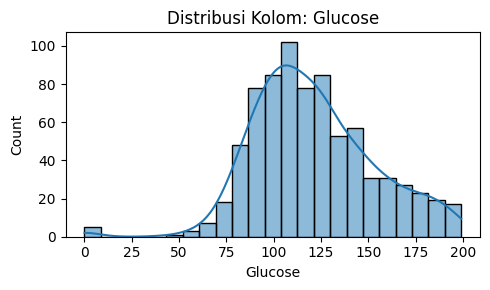

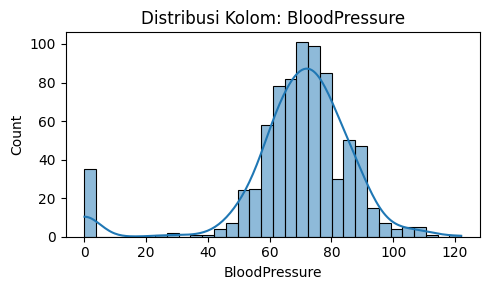

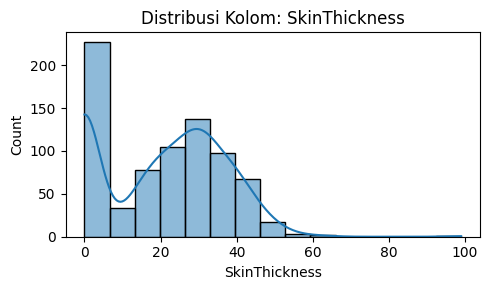

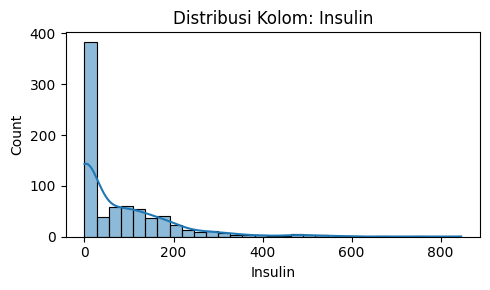

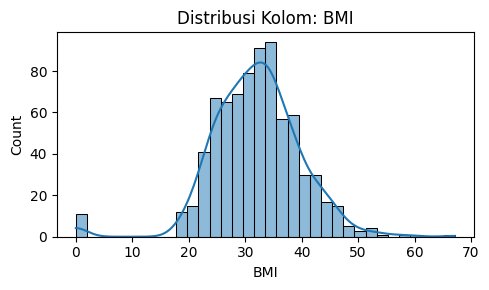

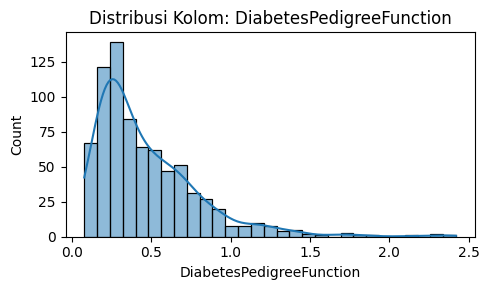

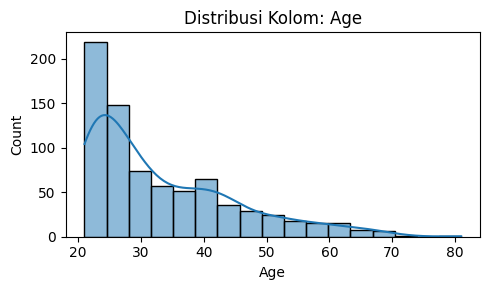

In [ ]:
for col in data.columns[:-1]:  # Kecuali 'Outcome'
    plt.figure(figsize=(5,3))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribusi Kolom: {col}')
    plt.tight_layout()
    plt.show()

**TENTUKAN FITUR & LABEL**

In [ ]:
feature_cols = ['Pregnancies','Glucose','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
x = data[feature_cols]
y = data['Outcome']

**CEK DATA KOSONG**

In [ ]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**HITUNG JUMLAH KELAS MASING-MASING DALAM 'OUTCOME'**

In [ ]:
jumlah_outcome = data['Outcome'].value_counts()

# Tampilkan hasil
print("Jumlah Data per Kelas Outcome:")
print(f"0 (Negatif Diabetes): {jumlah_outcome[0]} data")
print(f"1 (Positif Diabetes): {jumlah_outcome[1]} data")


Jumlah Data per Kelas Outcome:
0 (Negatif Diabetes): 500 data
1 (Positif Diabetes): 268 data


**NORMALISASI**

In [ ]:
# Pisahkan fitur dan label
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Normalisasi fitur
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Gabungkan kembali
df_scaled = pd.concat([X_scaled, y], axis=1)
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


**SPLIT DATA**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

**MODELING DENGAN DECISION TREE**

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Akurasi:", metrics.accuracy_score(y_test, y_pred))


Akurasi: 0.7337662337662337


**GRAFIK MATRIKS**

<Figure size 500x400 with 0 Axes>

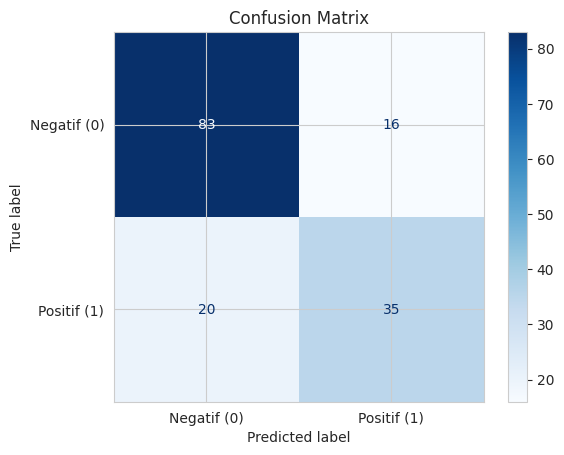

In [ ]:
# Asumsi variabel
feature_cols = ['Pregnancies','Glucose','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negatif (0)', 'Positif (1)'])

plt.figure(figsize=(5,4))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


**PIE CHART AKURASI & ERROR**

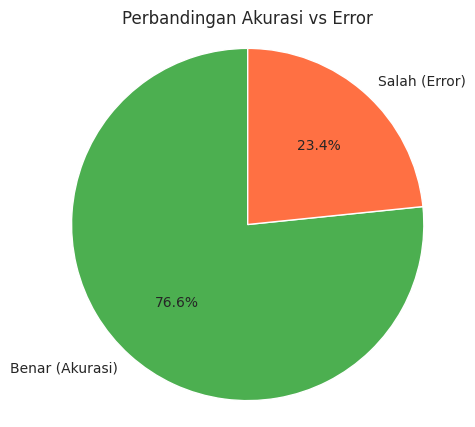

In [ ]:
from sklearn import metrics

akurasi = metrics.accuracy_score(y_test, y_pred)
error = 1 - akurasi

plt.figure(figsize=(5,5))
plt.pie([akurasi, error],
        labels=['Benar (Akurasi)', 'Salah (Error)'],
        autopct='%1.1f%%',
        colors=['#4CAF50','#FF7043'],
        startangle=90)
plt.axis('equal')
plt.title("Perbandingan Akurasi vs Error")
plt.show()


**GRAFIK PREDIKSI**

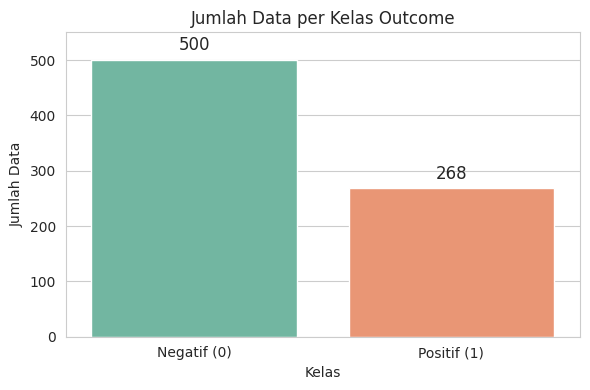

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data jumlah kelas (misalnya dari value_counts)
jumlah_outcome = pd.Series([500, 268], index=["Negatif (0)", "Positif (1)"])

# Plot
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")
ax = sns.barplot(x=jumlah_outcome.index, y=jumlah_outcome.values, palette="Set2")

# Tambahkan label jumlah di atas batang
for i, val in enumerate(jumlah_outcome.values):
    ax.text(i, val + 10, str(val), ha='center', va='bottom', fontsize=12)

plt.title("Jumlah Data per Kelas Outcome")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.ylim(0, max(jumlah_outcome.values) + 50)
plt.tight_layout()
plt.show()



**VISUALISASI DECISION TREE**

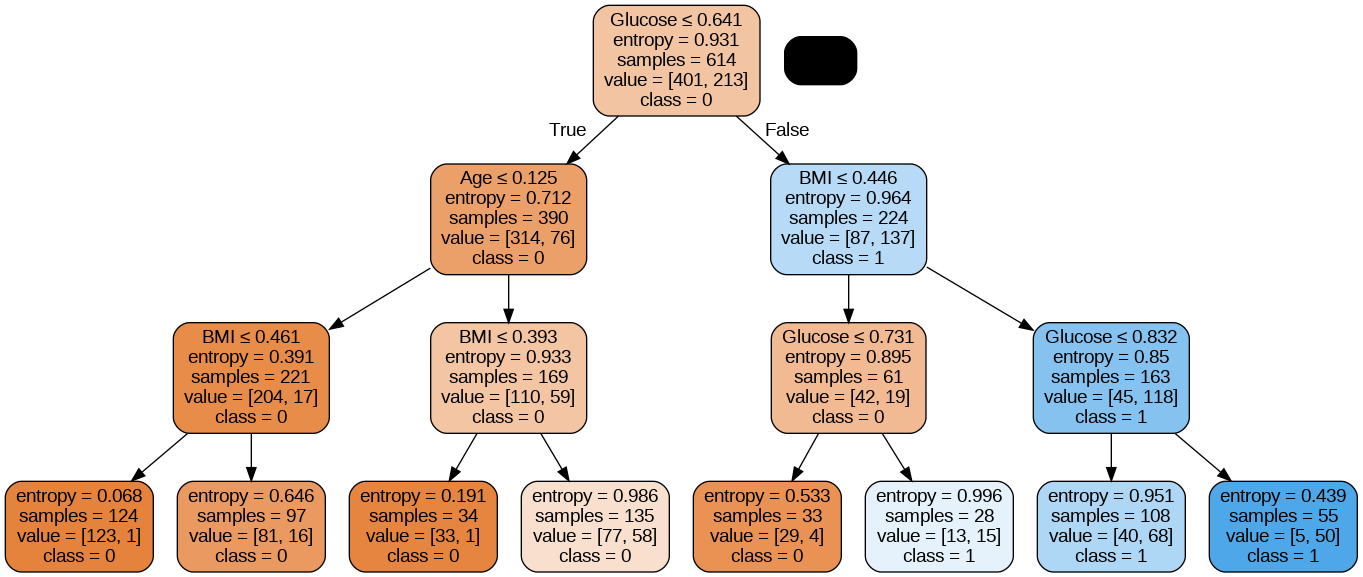

In [ ]:
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=feature_cols,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

**VISUALISASI PROBABILITAS PREDIKSI**

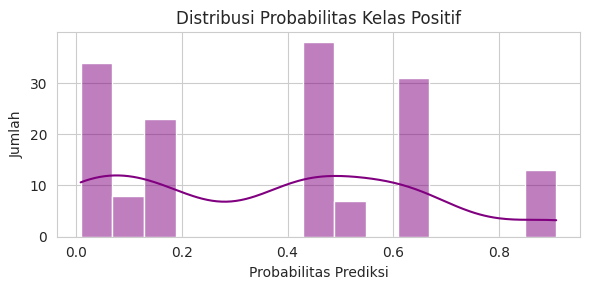

In [ ]:
if hasattr(clf, "predict_proba"):
    y_proba = clf.predict_proba(X_test)[:,1]  # Probabilitas kelas 1 (positif)

    plt.figure(figsize=(6, 3))
    sns.histplot(y_proba, bins=15, kde=True, color='purple')
    plt.title("Distribusi Probabilitas Kelas Positif")
    plt.xlabel("Probabilitas Prediksi")
    plt.ylabel("Jumlah")
    plt.tight_layout()
    plt.show()


**GRAFIK FITUR PENTING**

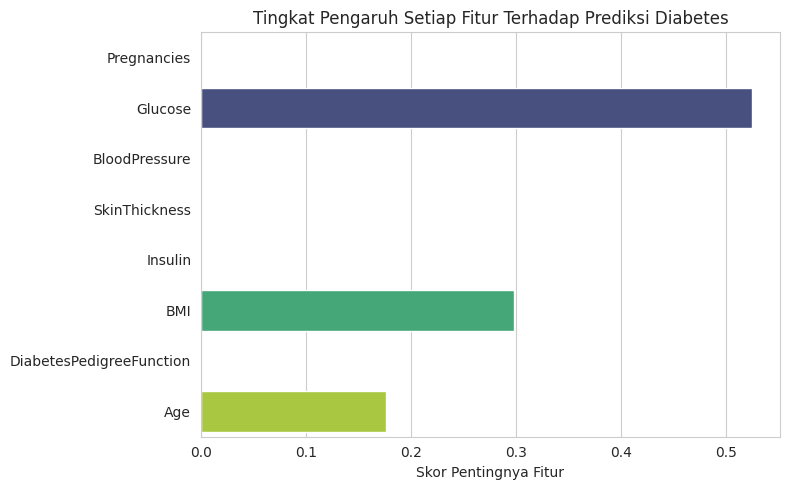

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gunakan kolom X_train langsung agar pasti sesuai
feature_cols = X_train.columns.tolist()
importances = clf.feature_importances_

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_cols, palette='viridis')
plt.xlabel('Skor Pentingnya Fitur')
plt.title('Tingkat Pengaruh Setiap Fitur Terhadap Prediksi Diabetes')
plt.tight_layout()
plt.show()


**KESIMPULAN**

Berdasarkan analisis data menggunakan algoritma Decision Tree (C4.5) pada dataset diabetes, dapat disimpulkan bahwa model mampu mengklasifikasikan pasien ke dalam kategori diabetes dan non-diabetes dengan cukup baik. Fitur-fitur seperti Glucose, BMI, dan Age terbukti menjadi variabel yang paling berpengaruh dalam menentukan hasil klasifikasi.

Visualisasi pohon keputusan menunjukkan jalur pengambilan keputusan yang logis dan mudah dipahami, sehingga sangat cocok untuk diterapkan dalam konteks medis maupun edukatif. Selain itu, model ini bersifat transparan dan interpretatif, yang memudahkan tenaga medis atau analis data untuk memahami alasan di balik prediksi yang dihasilkan.

Dengan akurasi dan struktur yang jelas, algoritma C4.5 terbukti cukup efektif dalam membantu proses diagnosis awal diabetes, serta memberikan pemahaman terhadap faktor-faktor risiko yang paling berkontribusi terhadap kondisi tersebut. Hal ini sangat mendukung penerapan pendekatan berbasis data dalam dunia kesehatan.
